# **Marketing Segmentation Analysis**

----------------------
## **Context**
----------------------
Customer segmentation is the process of dividing a dataset of customers into groups of similar customers based on certain common characteristics, usually for the purpose of understanding the population dataset in a better fashion. Understanding customer behavior and characteristics is usually a critical part of the marketing operations of any business or organization, with direct consequences on sales & marketing strategy. Customer segmentation is often viewed as a means to achieve a better return on investment from marketing efforts, and make organizations more efficient in terms of utilizing their money, time, and other critical resources in custom marketing strategies for different groups of customers based on their unique needs and motivations. 

For example, it has been understood from various research that customer segmentation often has a huge impact on people’s email engagement. Segmented campaigns often see over 100% more clicks than non-segmented campaigns, and email marketers who have segmented their audience before campaigning have reported a 6-7 times growth in their overall revenue. It has also been observed in various contexts that in today’s world, individual customers prefer personalized communications and offerings that cater to their particular interests.

In the context of marketing analytics then, customer segmentation has a vital role to play in optimizing ROI. It typically involves analyzing metrics around customer engagement with various marketing activities including but not limited to, ATL (above the line) marketing activities, BTL (below the line) campaigns, and targeting personalized offers. Typically, the variables of interest are customer profiles, campaign conversion rates, and information associated with various marketing channels. Based on these feature categories, the target is to create the best possible customer
segments from the given data.

----------------------
## **Objective**
----------------------
Using Unsupervised Learning ideas such as Dimensionality Reduction and Clustering, the objective is to come up with the best possible customer segments using the given customer dataset.

----------------------
## **Dataset**
----------------------
The dataset contains the following features:
- ID: Unique ID of each customer
- Year_Birth: Customer’s year of birth
- Education: Customer's level of education
- Marital_Status: Customer's marital status
- Kidhome: Number of small children in customer's household
- Teenhome: Number of teenagers in customer's household
- Income: Customer's yearly household income
- Recency: Number of days since the last purchase
- Dt_Customer: Date of customer's enrollment with the company
- MntFishProducts: The amount spent on fish products in the last 2 years
- MntMeatProducts: The amount spent on meat products in the last 2 years
- MntFruits: The amount spent on fruits products in the last 2 years
- MntSweetProducts: Amount spent on sweet products in the last 2 years
- MntWines: The amount spent on wine products in the last 2 years
- MntGoldProds: The amount spent on gold products in the last 2 years
- NumDealsPurchases: Number of purchases made with discount
- NumCatalogPurchases: Number of purchases made using a catalog (buying goods to be shipped through the mail)
- NumStorePurchases: Number of purchases made directly in stores
- NumWebPurchases: Number of purchases made through the company's website
- NumWebVisitsMonth: Number of visits to the company's website in the last month
- AcceptedCmp1: 1 if customer accepted the offer in the first campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the second campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the third campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the fourth campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the fifth campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
- Complain: 1 If the customer complained in the last 2 years, 0 otherwise

## **Importing Libraries**

In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

#scaling the data using z-score
from sklearn.preprocessing import StandardScaler

#Importing PCA and t-SNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
data = pd.read_csv("marketing_campaign.csv")

In [3]:
data_copy = data.copy()

In [4]:
pd.set_option('display.max_columns', None)
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Checking to see if all of the IDs are unique

In [6]:
data.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

**Observations:**
- **All of the identification numbers are considered to be unique, so this column do not seem to add value to our analysis, we will drop this column.**

In [7]:
#Dropping the ID, Martial Status, and Education columns 
# due to being unique and categorical variables
data.drop(columns = ['ID', 'Marital_Status', 'Education', 'Dt_Customer'], axis = 1, inplace = True)

## **Preprocessing and Data Exploration**

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0


In [9]:
data.isnull().sum()

Year_Birth              0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

**Observations:**
- **Average income for this particular group is approximately 52,000 USD, with an minimum of approximately 2,000 USD and a maximum north of 600,000 USD. This is cause for concern that our data is primary left side heavy and has a long right tail**
- **It appears that users prefer to spend their money on Wine and Meat products compared to the other products of interest (fish, sweets, and gold) as well as make purchases for often on the internet or through a catalog compared to in store purchases**
- **Participants are also very unlikely to complain in the last two years with an average complain rate of 0.9 basis points and has an approximately 15 percent response rate to an offer**


**Checking for Null Values**

In [10]:
data.isnull().sum()

Year_Birth              0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [11]:
data['Income'] = data['Income'].fillna(data['Income'].mean())

In [12]:
data.isnull().sum()

Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

**We suspect that the year of birth may be a typo, so we want to adjust these numbers to the latest time**


In [13]:
data.sort_values(by='Year_Birth', ascending=True)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
239,1893,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1899,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0
192,1900,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
1950,1940,51141.0,0,0,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,0
424,1941,93027.0,0,0,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1995,71163.0,0,0,30,283,17,372,138,106,44,1,3,8,12,1,0,0,0,0,0,0,0
1850,1995,83257.0,0,0,56,536,27,590,38,107,67,1,5,10,12,6,1,0,1,0,0,1,1
696,1995,34824.0,0,0,65,4,2,11,2,0,4,1,1,0,2,6,0,0,0,0,0,0,0
1170,1996,14421.0,0,0,81,0,0,2,3,3,8,1,1,0,2,5,1,0,0,0,0,0,0


In [14]:
data.loc[239, 'Year_Birth'] = 1940
data.loc[339, 'Year_Birth'] = 1940
data.loc[192, 'Year_Birth'] = 1940

In [15]:
data.sort_values(by='Year_Birth', ascending=True)

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
239,1940,60182.0,0,1,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1940,83532.0,0,0,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0
192,1940,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
1950,1940,51141.0,0,0,96,144,0,7,0,0,6,1,3,1,4,5,0,0,0,0,0,0,0
424,1941,93027.0,0,0,77,1285,42,716,55,0,21,0,7,10,5,2,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,1995,71163.0,0,0,30,283,17,372,138,106,44,1,3,8,12,1,0,0,0,0,0,0,0
1850,1995,83257.0,0,0,56,536,27,590,38,107,67,1,5,10,12,6,1,0,1,0,0,1,1
696,1995,34824.0,0,0,65,4,2,11,2,0,4,1,1,0,2,6,0,0,0,0,0,0,0
1170,1996,14421.0,0,0,81,0,0,2,3,3,8,1,1,0,2,5,1,0,0,0,0,0,0


**Lets check for outliers in the data**

Year_Birth
Skew :  -0.1


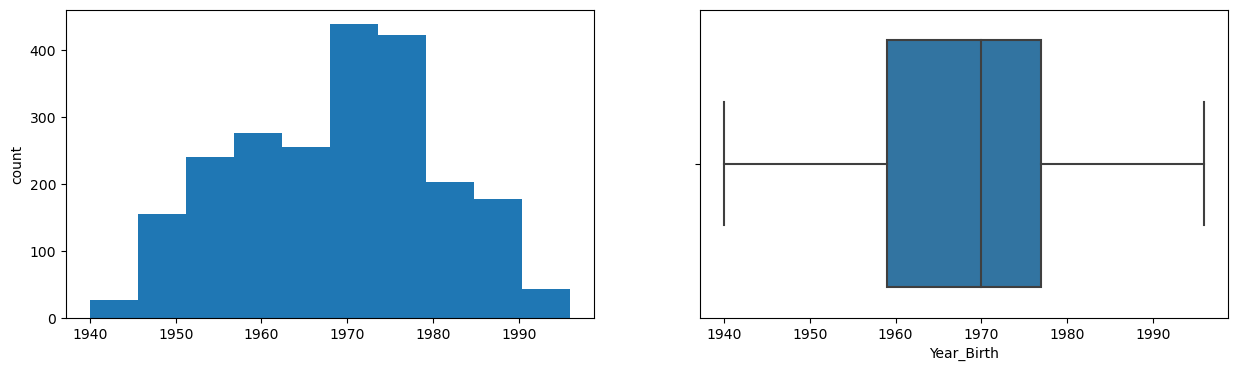

Income
Skew :  6.8


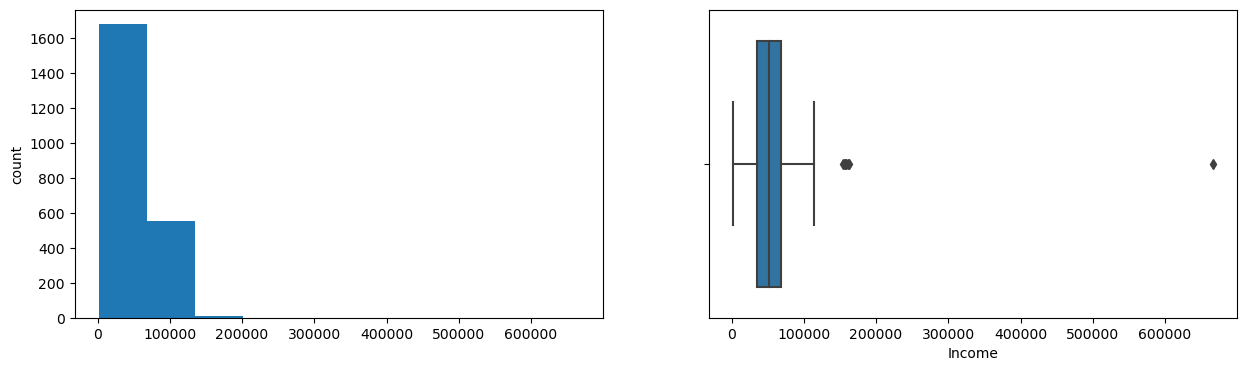

Kidhome
Skew :  0.64


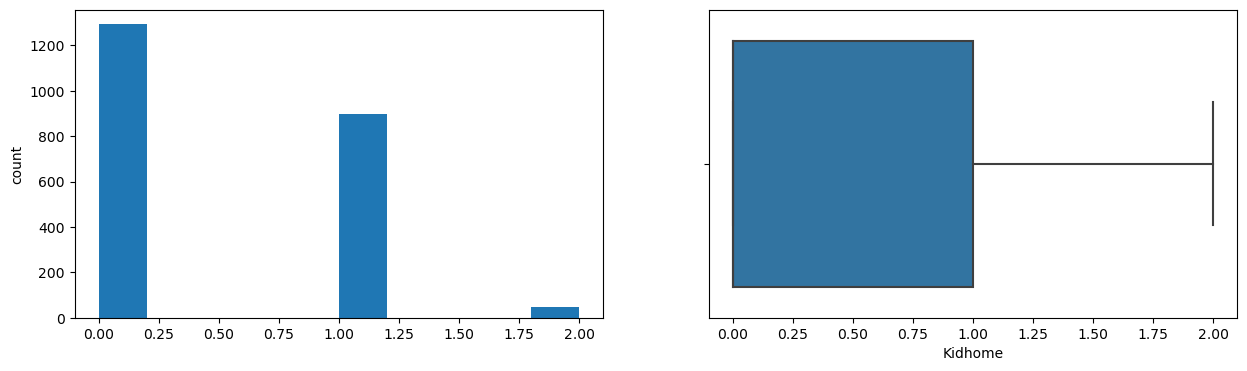

Teenhome
Skew :  0.41


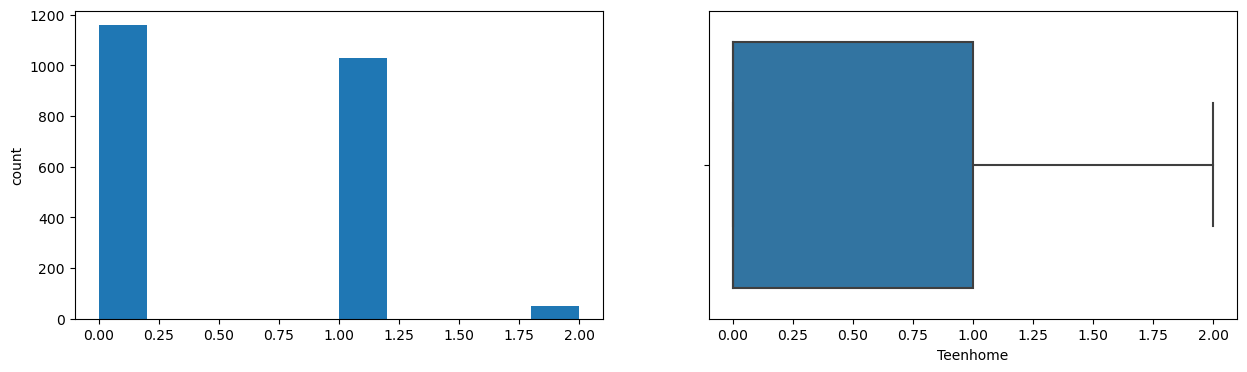

Recency
Skew :  -0.0


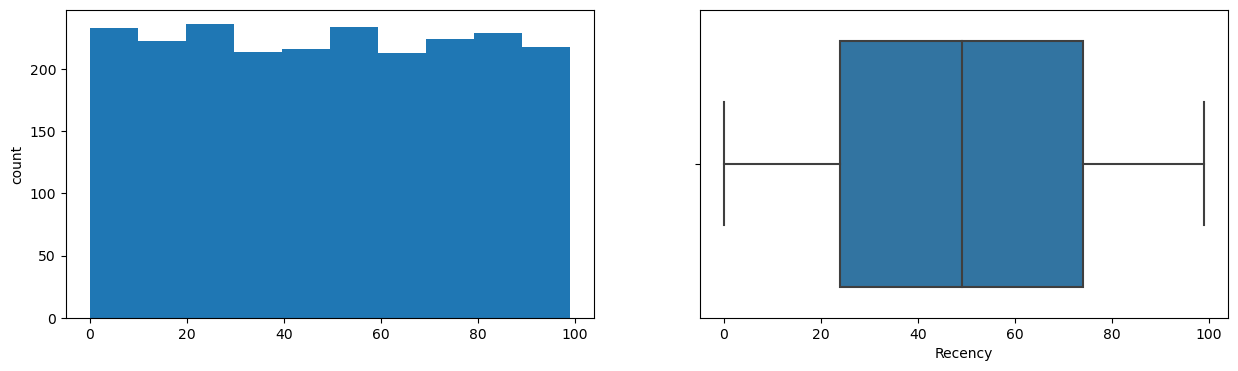

MntWines
Skew :  1.18


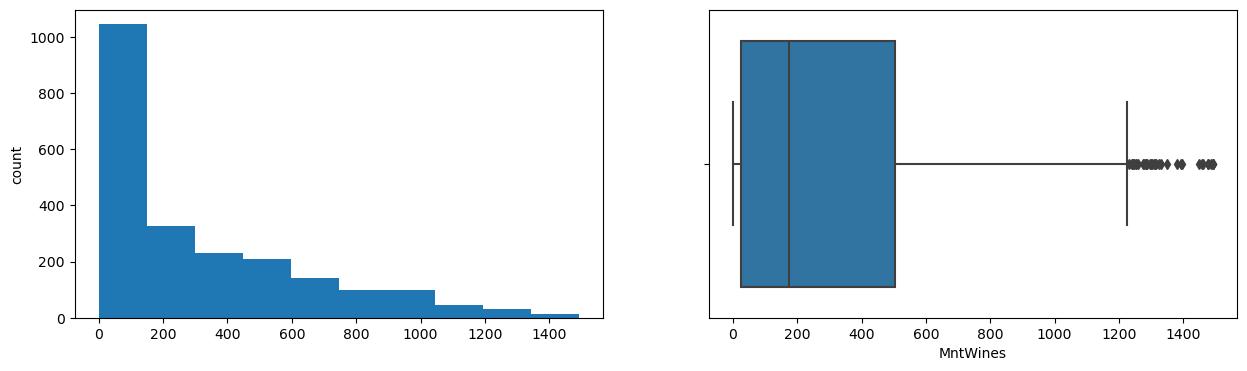

MntFruits
Skew :  2.1


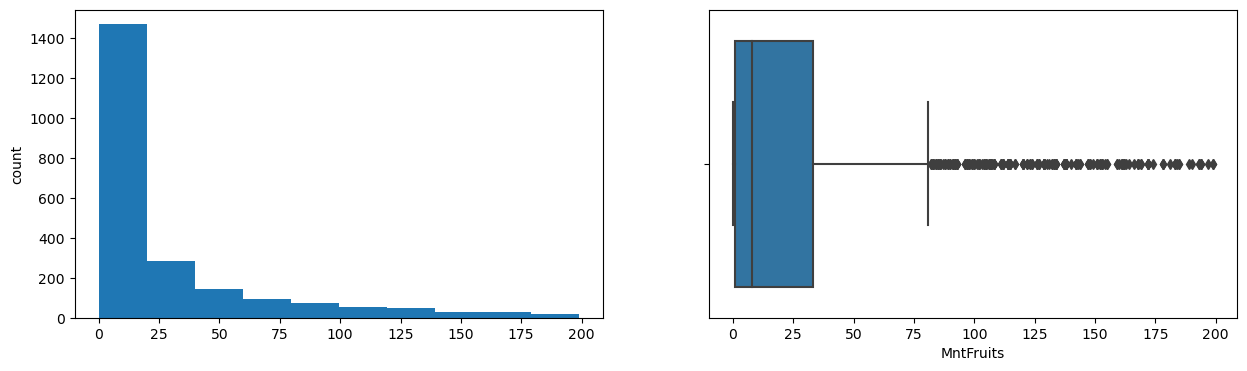

MntMeatProducts
Skew :  2.08


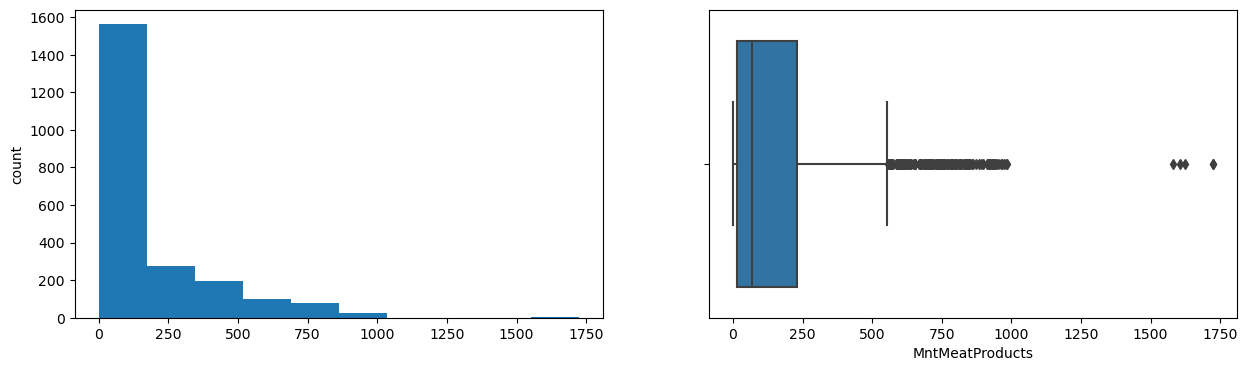

MntFishProducts
Skew :  1.92


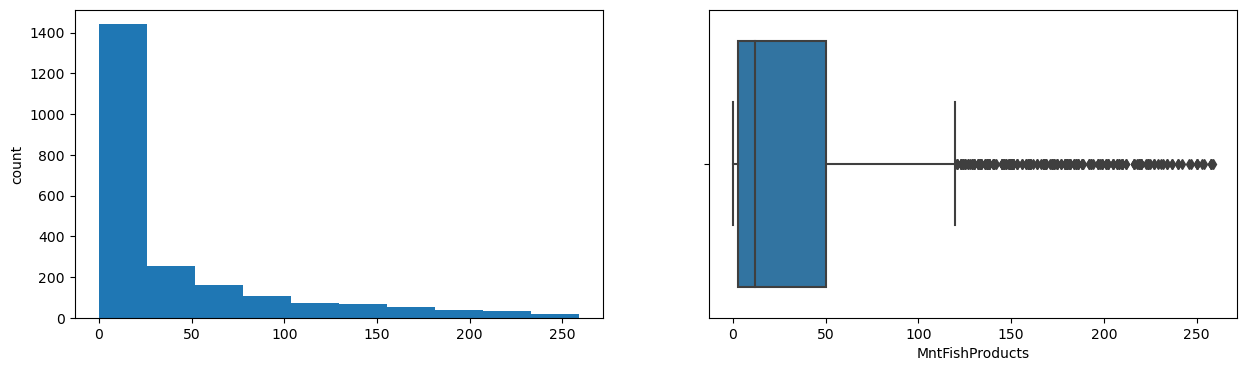

MntSweetProducts
Skew :  2.14


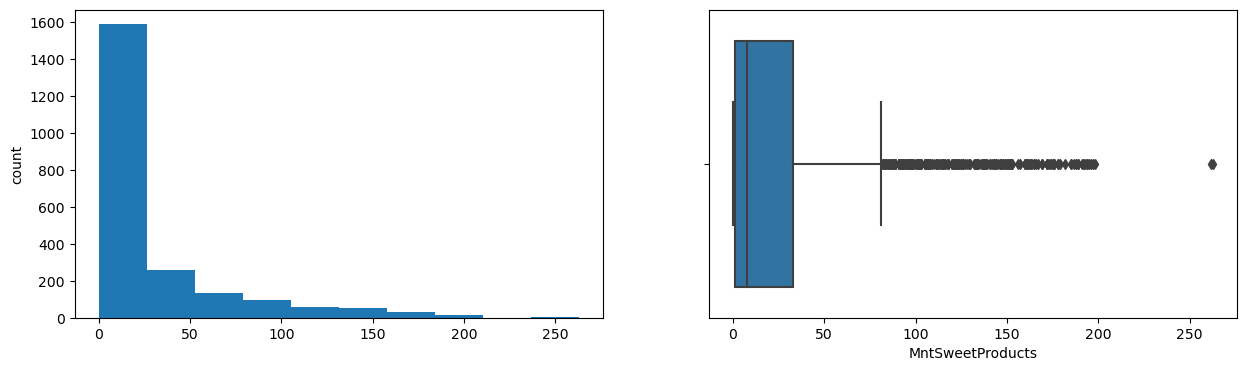

MntGoldProds
Skew :  1.89


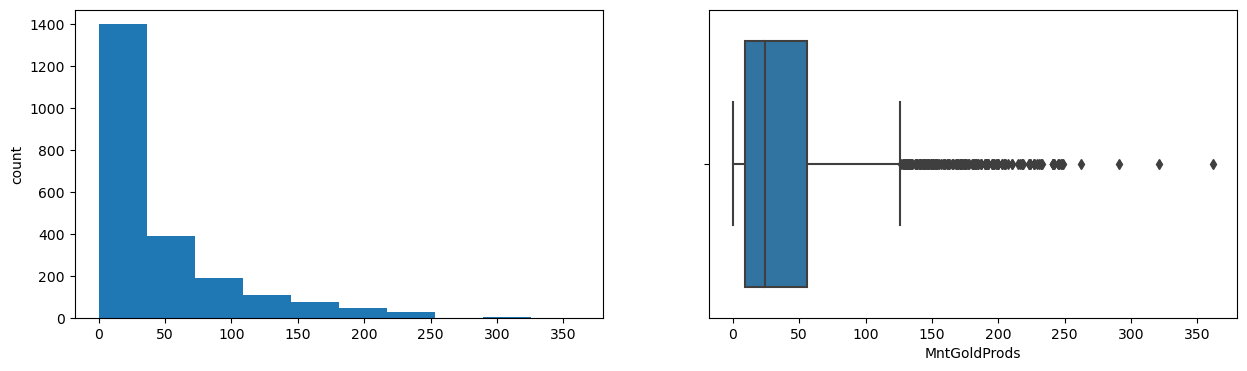

NumDealsPurchases
Skew :  2.42


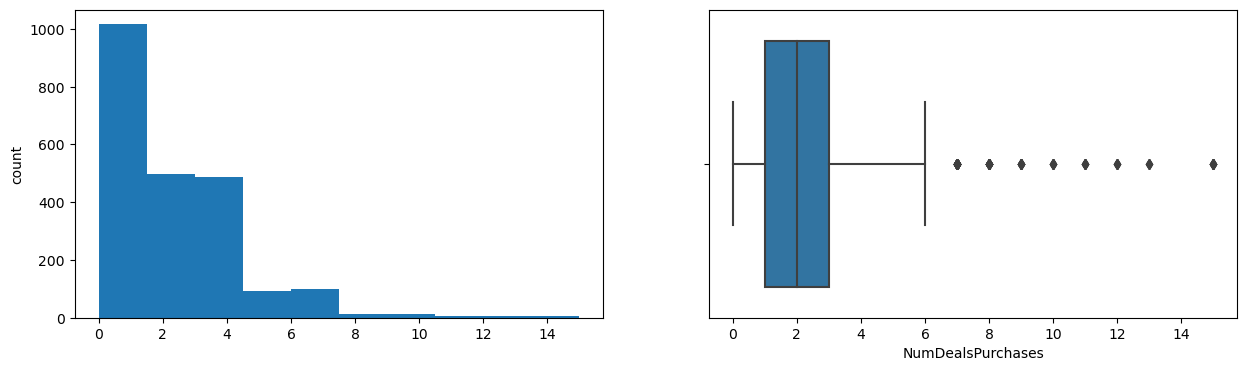

NumWebPurchases
Skew :  1.38


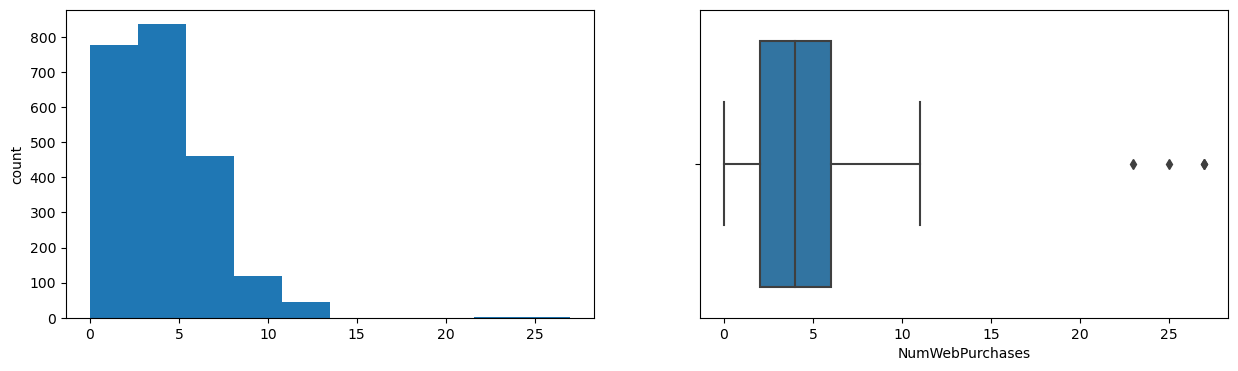

NumCatalogPurchases
Skew :  1.88


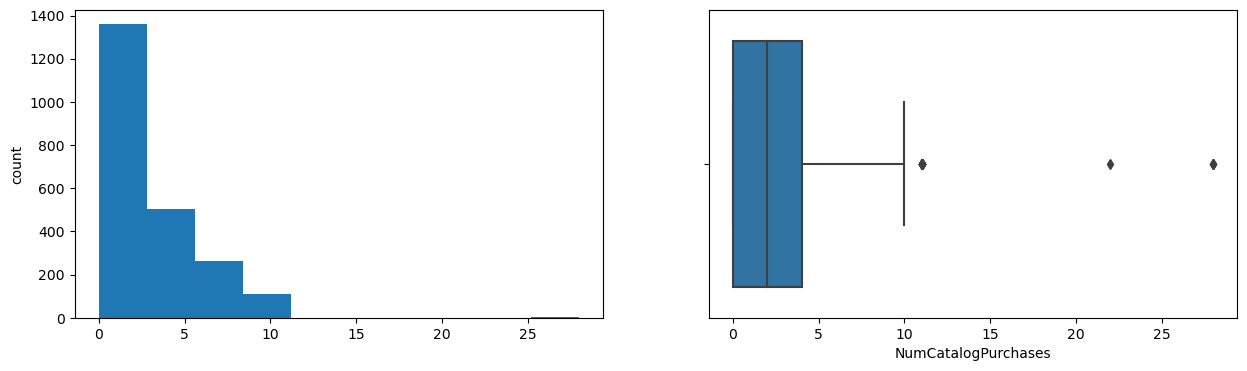

NumStorePurchases
Skew :  0.7


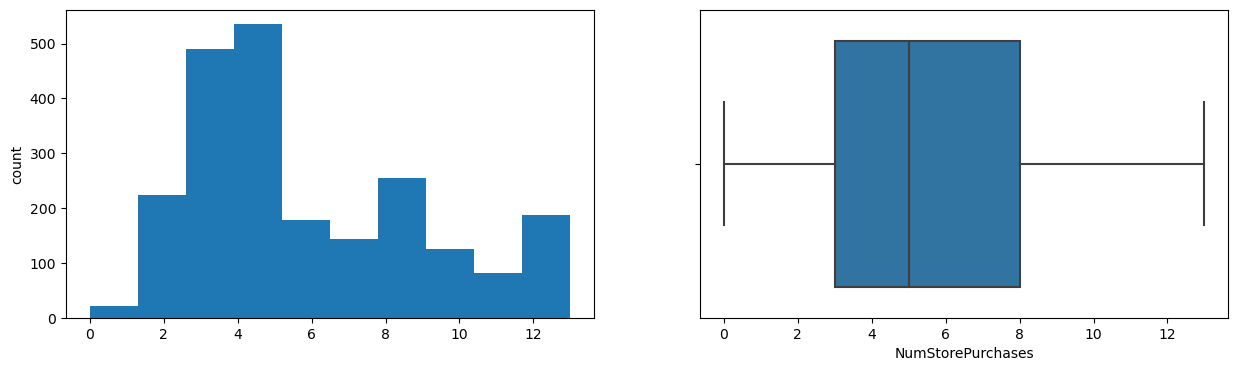

NumWebVisitsMonth
Skew :  0.21


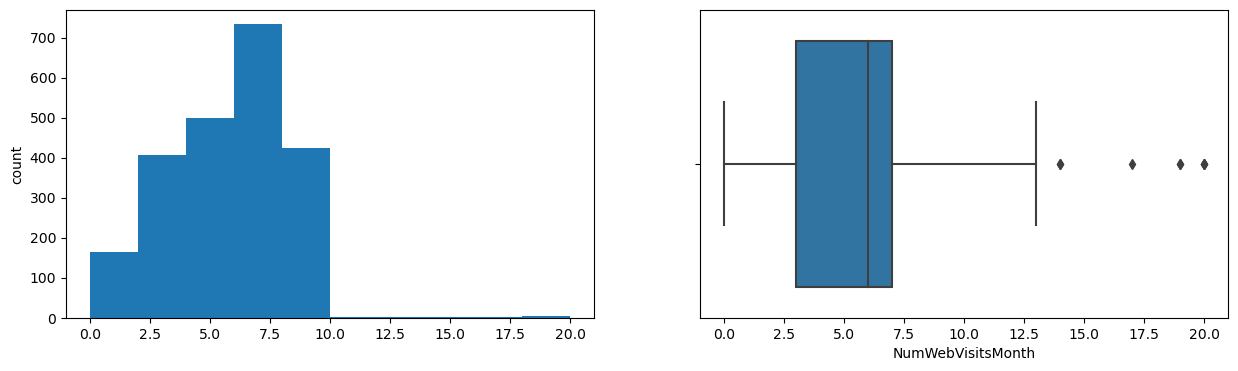

AcceptedCmp3
Skew :  3.29


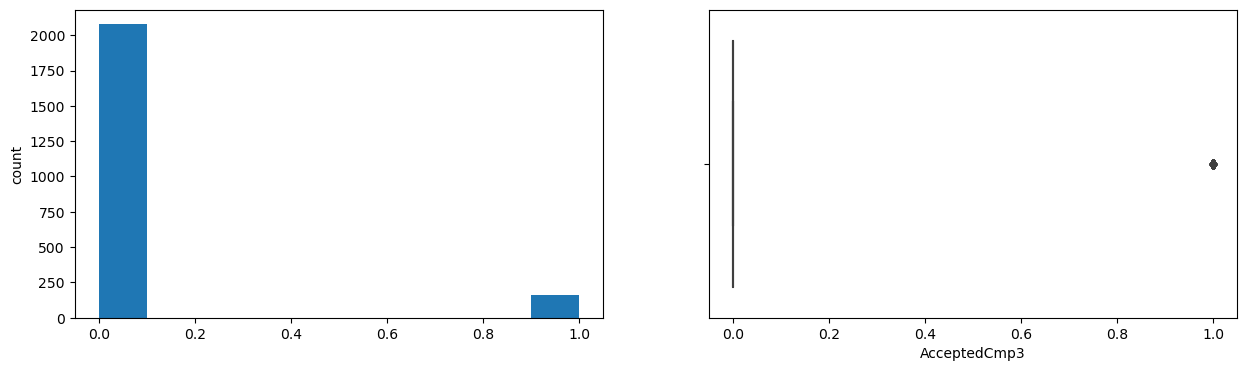

AcceptedCmp4
Skew :  3.24


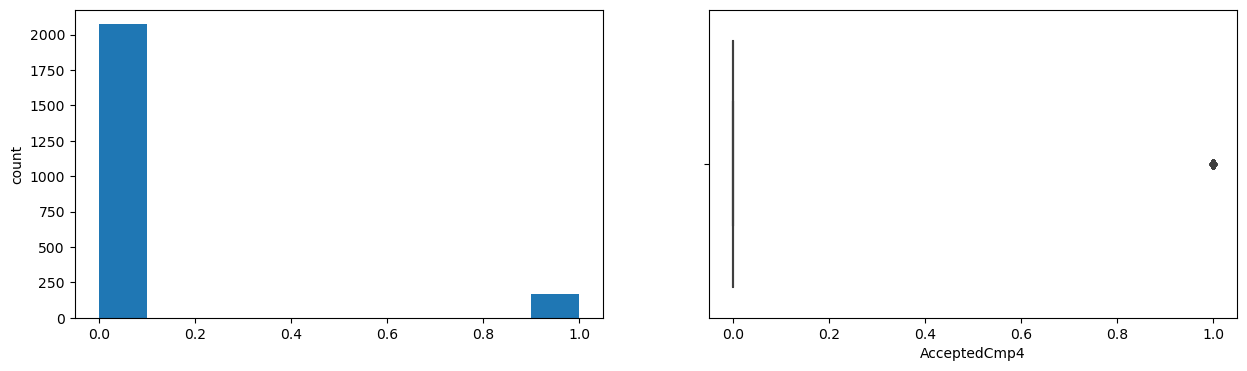

AcceptedCmp5
Skew :  3.29


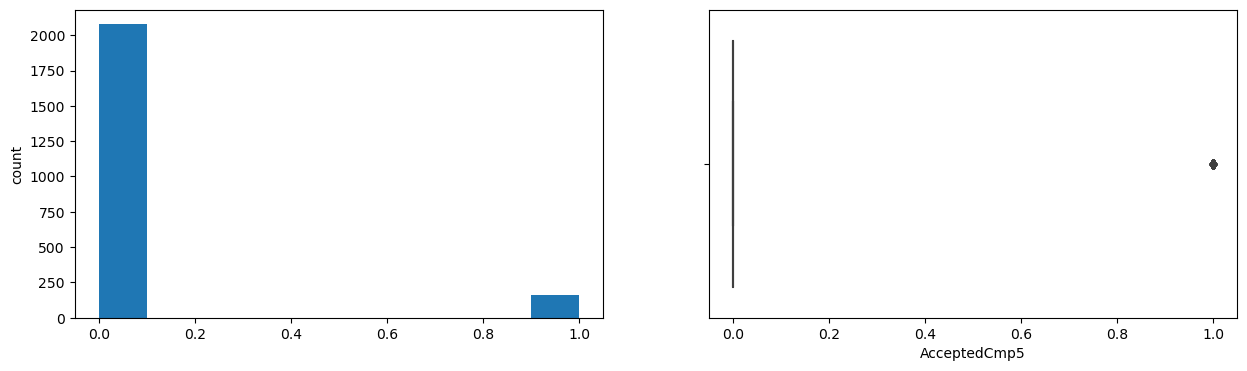

AcceptedCmp1
Skew :  3.56


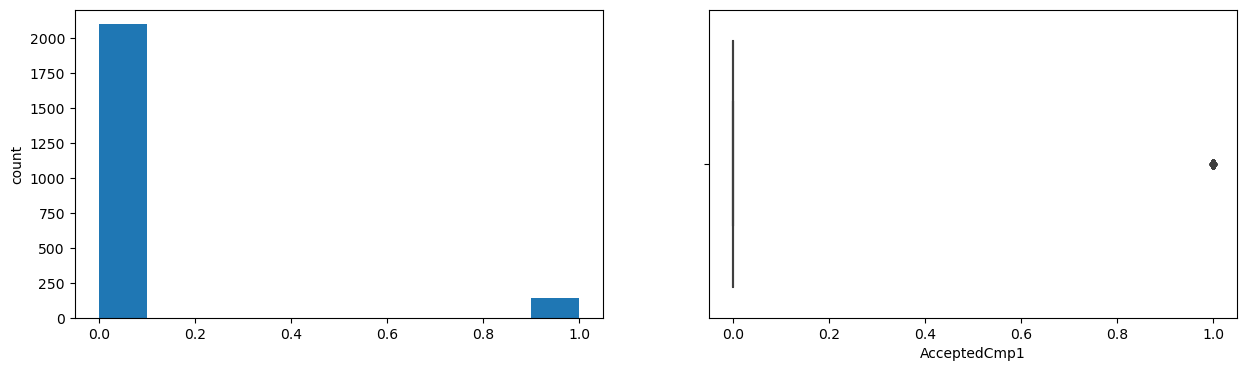

AcceptedCmp2
Skew :  8.62


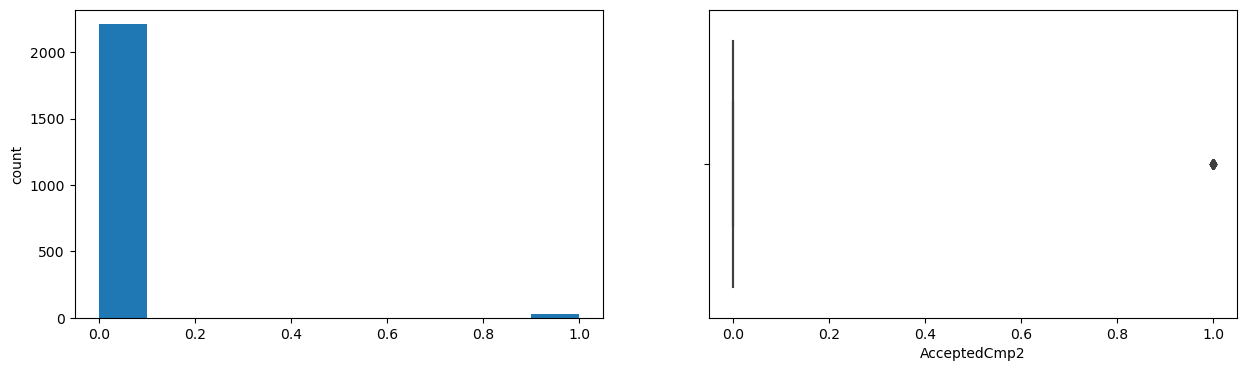

Complain
Skew :  10.19


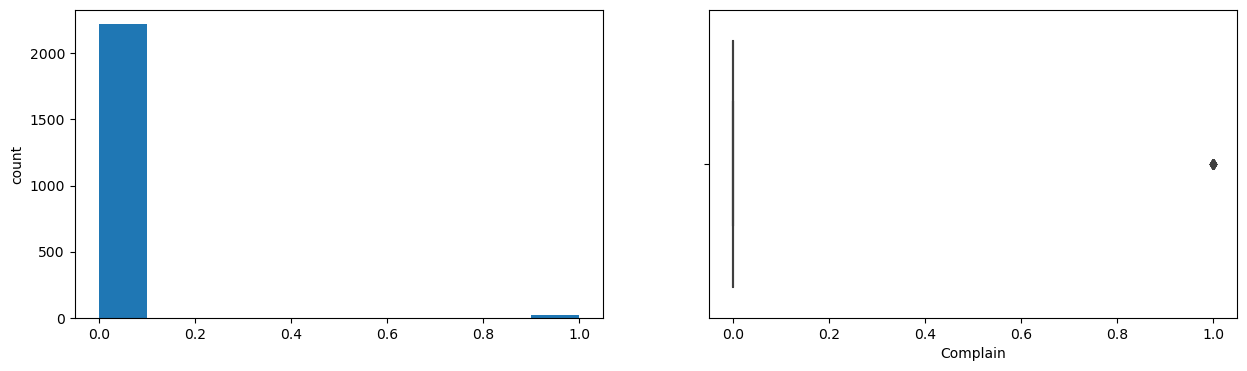

Response
Skew :  1.97


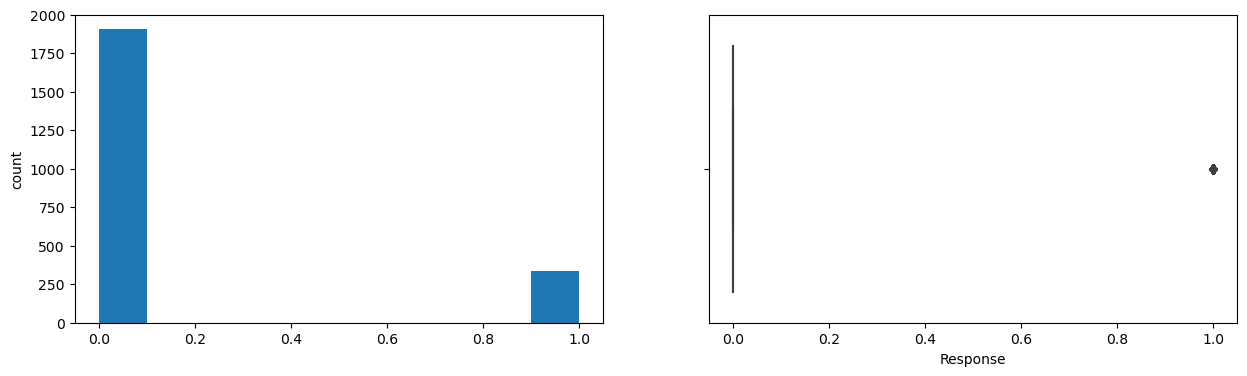

In [16]:
cont_cols = list(data.columns)

for col in cont_cols:
    
    print(col)
    
    print('Skew : ', round(data[col].skew(), 2))
    
    plt.figure(figsize = (15,4))
    
    plt.subplot(1, 2, 1)
    
    data[col].hist(bins = 10, grid = False)
    
    plt.ylabel('count')
    
    plt.subplot(1, 2, 2)
    
    sns.boxplot(x = data[col])
    
    plt.show()

**Observations:**
- **These distributions plots show that income, MntWines, MntMeatProducts, MntFruits, MntFishProducts, MntSweetsProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, and NumCatalogPurchases are highly right skewd. Is it evident that these variables have significant outliers present.**
- **NumWebVisitsMonth appears to be slightly right skewed.**
- **Year of Birth is normal distributed after the modification earlier.**

**Let's check corrleation among all of the variables**

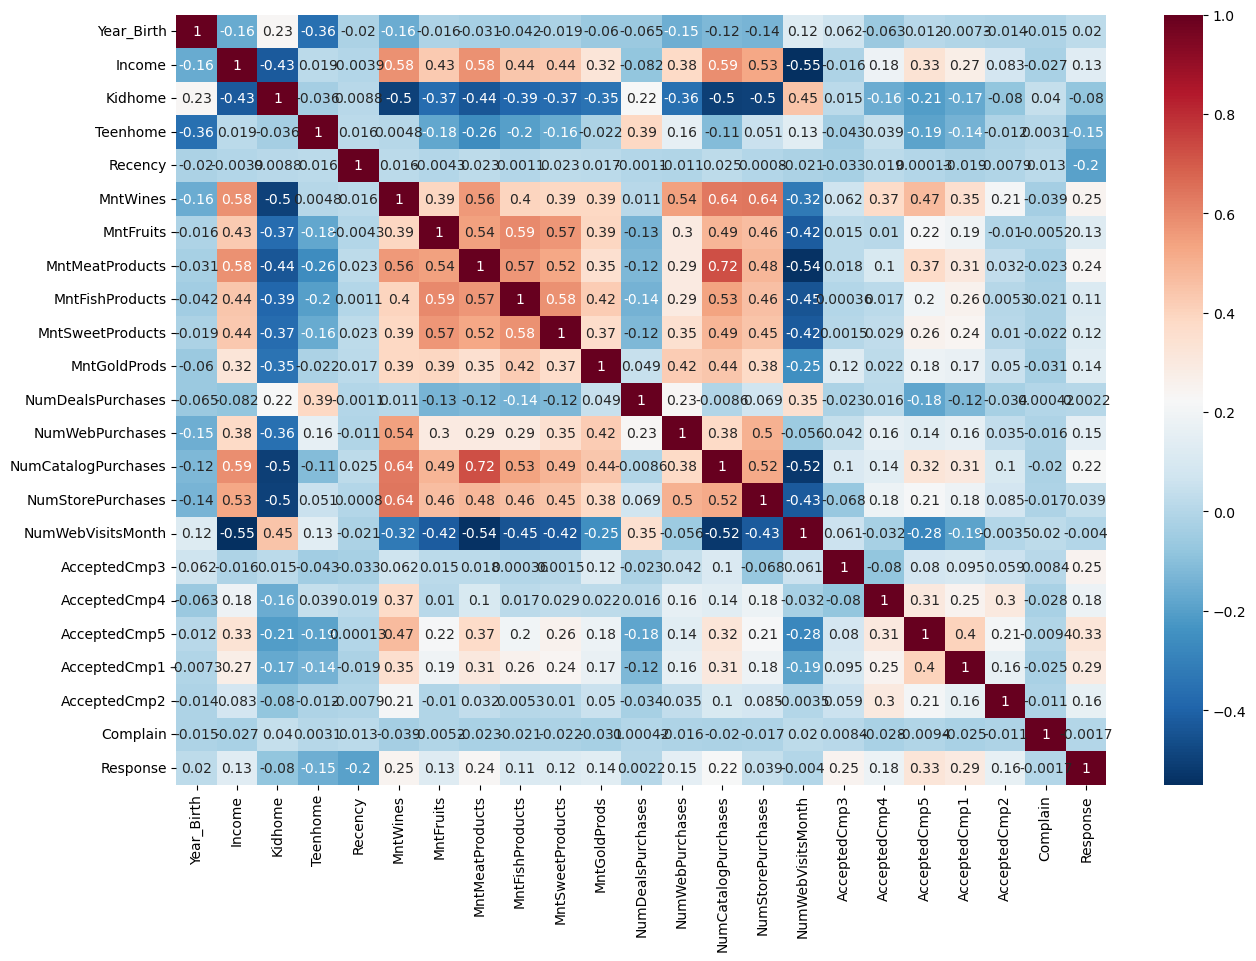

In [17]:
plt.figure(figsize= (15,10))

sns.heatmap(data.corr(), annot = True, cmap = "RdBu_r")

plt.show()

**Observations:**

- We can see a **high positive correlation** among the following variables: 
    1. MntMeatProducts and NumCatalogPurchases
- We can see a **high negative correlation** among the following variables:
    1. NumWebVisitsMonth with Income, MntMeatProducts, and NumCatalogPurchases
    2. KidHome with MntWines, NumCatalogPurchases, and NumStorePurchases

In [18]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)

In [19]:
data_scaled.isnull().sum()

Year_Birth             0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [20]:
data_scaled.shape

(2240, 23)

## **Principle Component Analysis**

In [21]:
# Determining the numbe of principal components to generate
n = data_scaled.shape[1]

# Discovering principal components for the data
pca = PCA(n_components = n, random_state = 1)

data_pca1 = pd.DataFrame(pca.fit_transform(data_scaled))

#Percent of variance explain by each principal component
exp_var = pca.explained_variance_ratio_

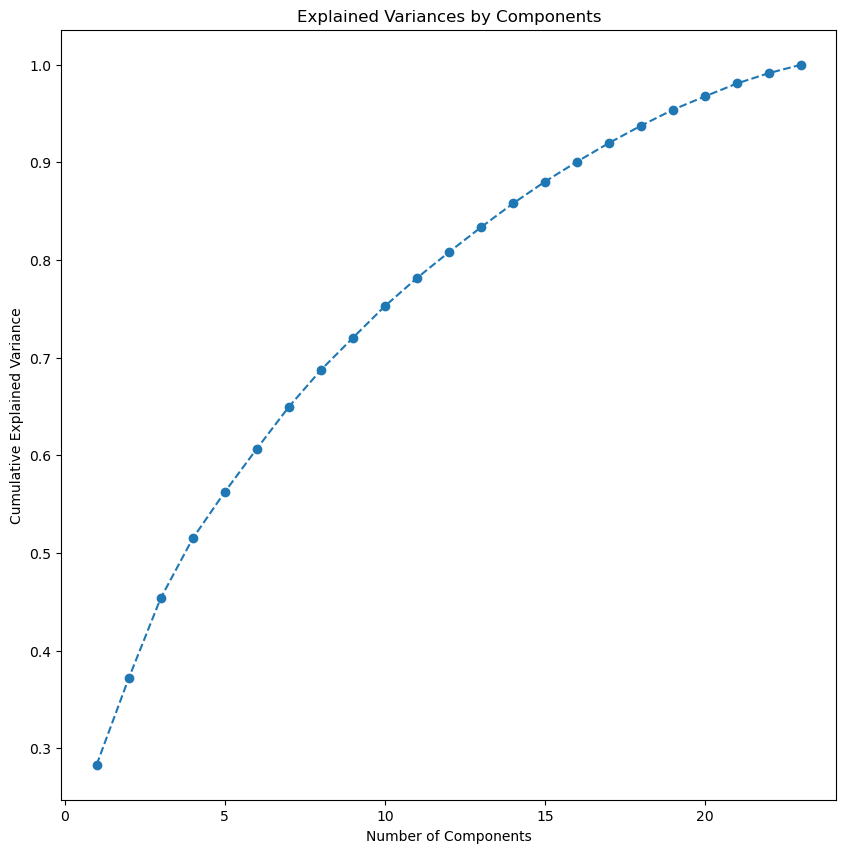

In [22]:
# Plotting the explained cumulative varinace by principal components
plt.figure(figsize = (10, 10))

plt.plot(range(1, 24), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')

plt.title("Explained Variances by Components")

plt.xlabel("Number of Components")

plt.ylabel("Cumulative Explained Variance")

plt.show()

**Now we want to find the least number of components that yield more than 70% variance**

In [23]:
sum = 0

for ix, i in enumerate(exp_var):
    
    sum = sum + i
    
    if (sum > 0.70):
        
        print("Number of PCs that explain at least 70 % variance: ", ix + 1)
        break

Number of PCs that explain at least 70 % variance:  9


**Observations:**
- We can see that out of the original 23 features, we have reduced the number of feature through PCA to 9 principal components. The first 9 principal components explain approximatley 72% of the original variation.
- This is a **61% reduciton in the dimensionality of the dataset with only a loss of approximately 30% variance loss**

In [24]:
PC_comps = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7', 'PC8', 'PC9']

data_pca = pd.DataFrame(np.round(pca.components_[:9,:], 2), index = PC_comps, columns = data_scaled.columns)

data_pca.T

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Year_Birth,-0.06,-0.35,0.04,0.27,0.49,-0.13,0.12,0.16,0.38
Income,0.29,0.07,-0.03,-0.13,-0.07,-0.01,0.03,-0.16,0.29
Kidhome,-0.26,-0.10,0.08,0.19,0.22,0.02,0.10,-0.27,0.03
Teenhome,-0.06,0.54,-0.01,-0.09,-0.21,0.05,-0.08,-0.08,-0.02
Recency,0.00,0.04,-0.11,-0.20,0.51,0.56,-0.46,-0.16,-0.08
MntWines,0.31,0.16,0.20,-0.05,0.08,0.01,-0.00,-0.01,0.17
MntFruits,0.27,-0.10,-0.20,0.14,0.06,-0.03,0.08,0.08,-0.20
MntMeatProducts,0.31,-0.13,-0.06,0.03,0.03,0.01,0.03,-0.19,0.22
MntFishProducts,0.28,-0.11,-0.20,0.12,0.06,-0.03,0.04,0.05,-0.27
MntSweetProducts,0.27,-0.08,-0.17,0.11,0.11,-0.02,0.05,0.02,-0.27


**Observations:**

- Each principal component is a linear combination of the original features. 
- For example, we can write the equation for PC1 in the following manner:

$PC1 = -0.06 * YearBirth + 0.29 * Income + -0.26 * KidHome + -0.06 * Teenhome + 0.00 * Recency + 0.31 * MntWines + 0.27 * MntFruits + 0.31 * MntMeatProducts + 0.28 * MntFishProducts + 0.27 * MntSweetProducts + 0.22 * MntGoldProducts + -0.06 * NumDealsPurchases + 0.21 * NumWebPurchases + 0.32 * NumCatalogPurchases + 0.28 * NumStorePurchases + -0.25 * NumWebVisitsMonth + 0.02 * Acceptedcmp3 + 0.10 * AcceptedCmp4 + 0.19 * AcceptedCmp5 + 0.17 * AcceptedCmp1 + 0.06 * AcceptedCmp2 + -0.02 * Complain + 0.11 * Response$

- The first four principal components pick up around 52% of the variability in the data, which is a considerable amount.

- The magnitude of the weights multiplied with each of the original features that comprise a principal component, is one way to look at the importance of each of the original features. This is relevant in a business context, in deciding which features in the dataset are important for the problem and which ones are not. Normally, a threshold is used as a cut-off to determine if a feature is important or not. For example, we can consider only those weights with an absolute value greater than 0.25 as significant.

**Note:** The decision regarding this threshold value may vary from case to case, and is purely a business decision.

In [25]:
def color_high(val):
    
    if val < -0.25:                     # You can decide any value as per your understanding
        return 'background: pink'
    
    elif val > 0.25:
        return 'background: skyblue'   
    
data_pca.T.style.applymap(color_high)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
Year_Birth,-0.060000,-0.350000,0.040000,0.270000,0.490000,-0.130000,0.120000,0.160000,0.380000
Income,0.290000,0.070000,-0.030000,-0.130000,-0.070000,-0.010000,0.030000,-0.160000,0.290000
Kidhome,-0.260000,-0.100000,0.080000,0.190000,0.220000,0.020000,0.100000,-0.270000,0.030000
Teenhome,-0.060000,0.540000,-0.010000,-0.090000,-0.210000,0.050000,-0.080000,-0.080000,-0.020000
Recency,0.000000,0.040000,-0.110000,-0.200000,0.510000,0.560000,-0.460000,-0.160000,-0.080000
MntWines,0.310000,0.160000,0.200000,-0.050000,0.080000,0.010000,-0.000000,-0.010000,0.170000
MntFruits,0.270000,-0.100000,-0.200000,0.140000,0.060000,-0.030000,0.080000,0.080000,-0.200000
MntMeatProducts,0.310000,-0.130000,-0.060000,0.030000,0.030000,0.010000,0.030000,-0.190000,0.220000
MntFishProducts,0.280000,-0.110000,-0.200000,0.120000,0.060000,-0.030000,0.040000,0.050000,-0.270000
MntSweetProducts,0.270000,-0.080000,-0.170000,0.110000,0.110000,-0.020000,0.050000,0.020000,-0.270000


**Observations:**


**We can also visualize the data in 2 dimensions, using the first two principal components.**

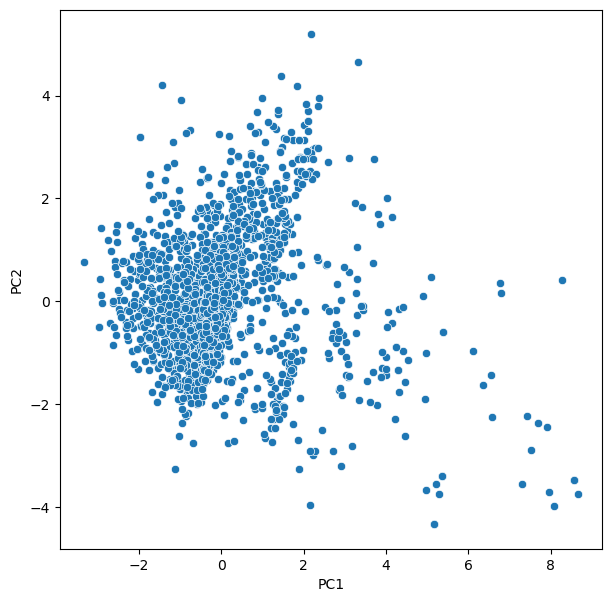

In [26]:
plt.figure(figsize = (7,7))

sns.scatterplot(x = data_pca1[2], y = data_pca1[3])

plt.xlabel("PC1")

plt.ylabel("PC2")

plt.show()

## **t-SNE**

In [27]:
#Fitting t-SNE with number of components equal to 2
tsne = TSNE(n_components = 2, random_state =1)

data_tsne = tsne.fit_transform(data_scaled)

/Users/jessehendren-mills/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jessehendren-mills/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [28]:
#Converting the embedding to a dataframe
data_tsne2 = pd.DataFrame(data_tsne, columns = ['X1', 'X2'])

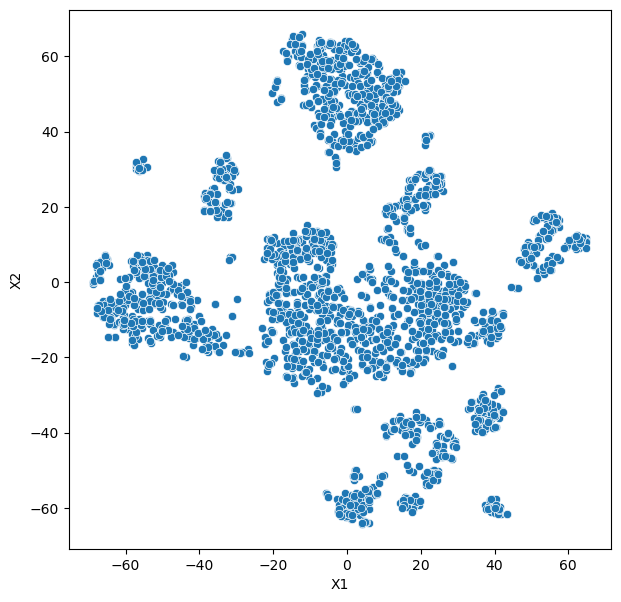

In [29]:
#Scatterplot for two components
plt.figure(figsize = (7,7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne2)

plt.show()

In [30]:
#Fitting t-SNE with number of components equal to 3
tsne = TSNE(n_components = 3, random_state = 1)

data_tsne = tsne.fit_transform(data_scaled)

/Users/jessehendren-mills/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jessehendren-mills/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [31]:
data_tsne3 = pd.DataFrame(data_tsne, columns = ['X1', 'X2', 'X3'])

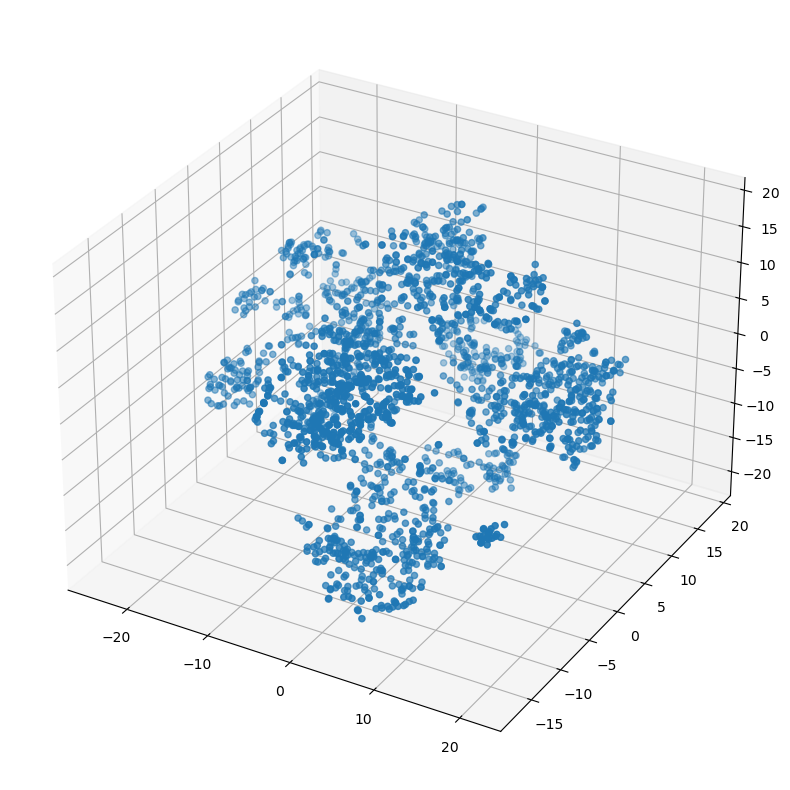

In [32]:
# Scatter plot for all three components
fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(111, projection = '3d')

x = data_tsne3['X1']

y = data_tsne3['X2']

z = data_tsne3['X3']

ax.scatter(x, y, z)

plt.show()

**Observations:**
- We can see about 6 groups in the data 
- We will label the groups using values of the X1 and X2 axes

/Users/jessehendren-mills/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jessehendren-mills/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/jessehendren-mills/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/jessehendren-mills/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/jessehendren-mills/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from

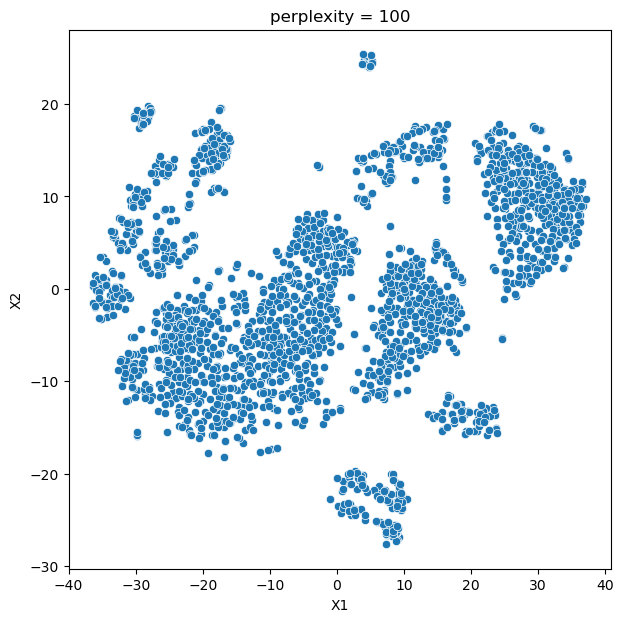

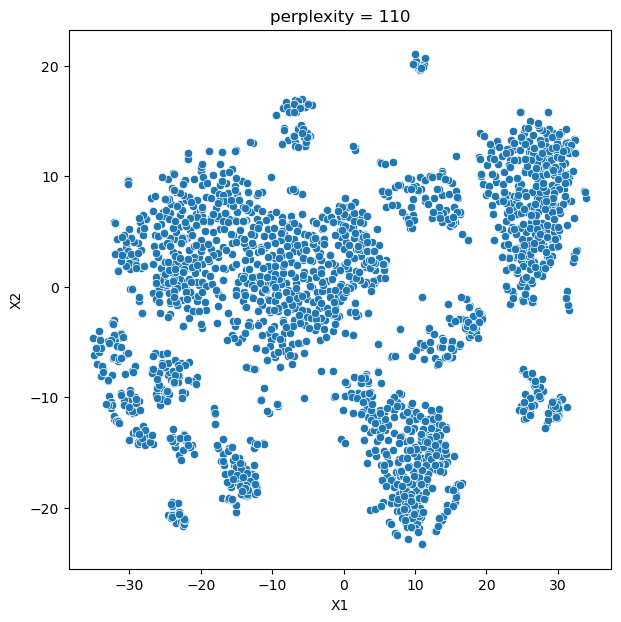

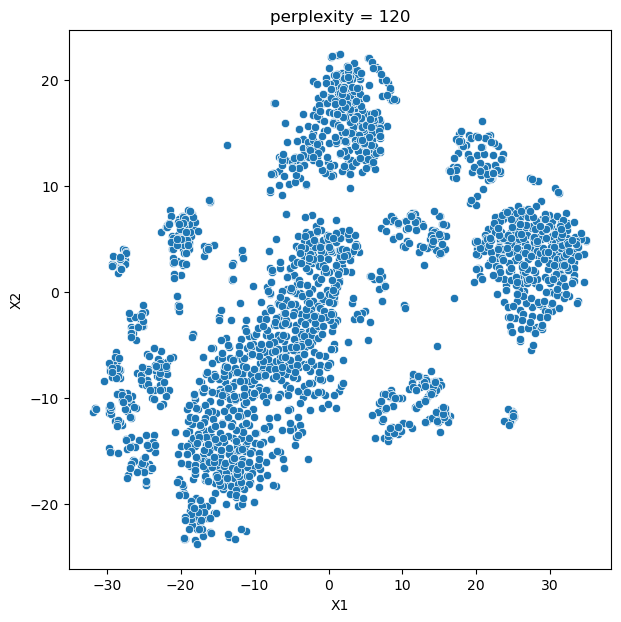

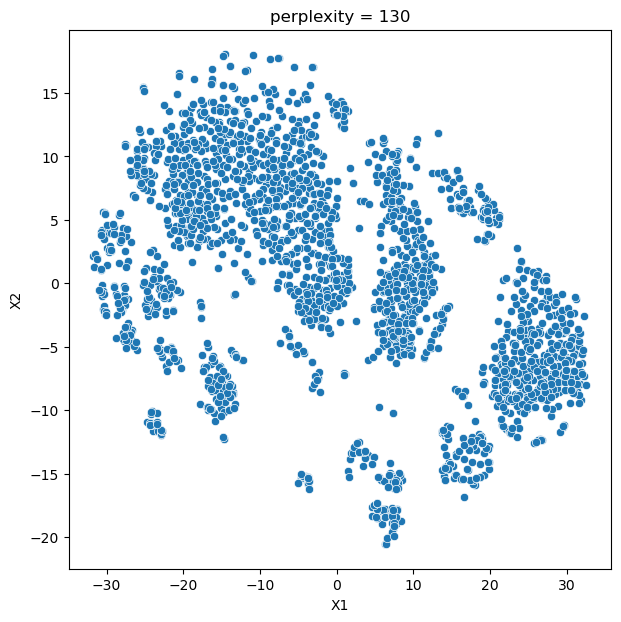

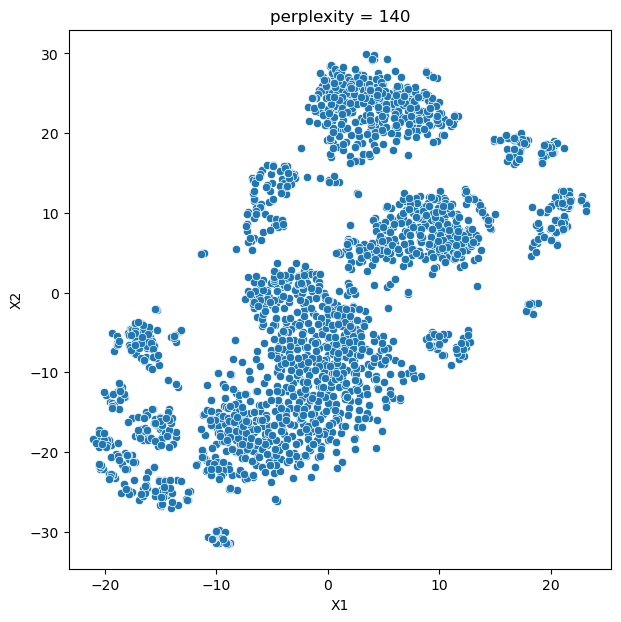

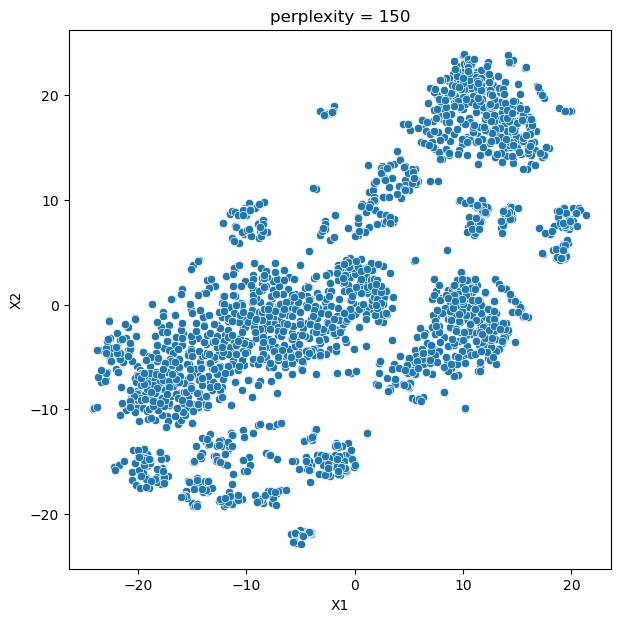

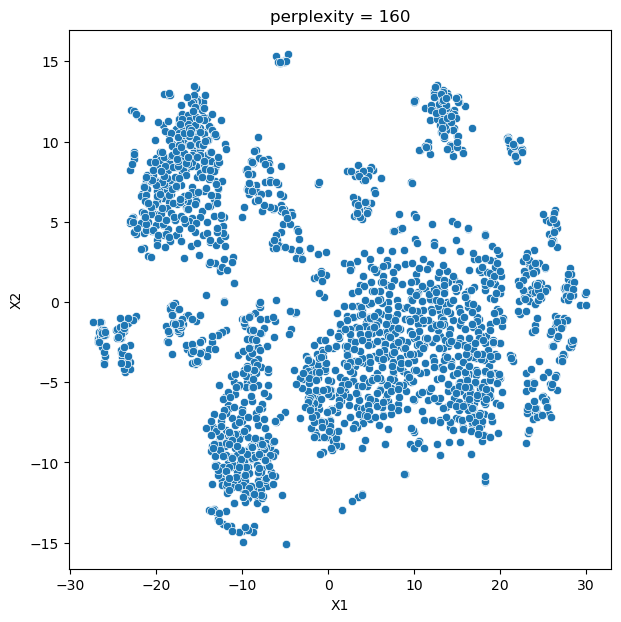

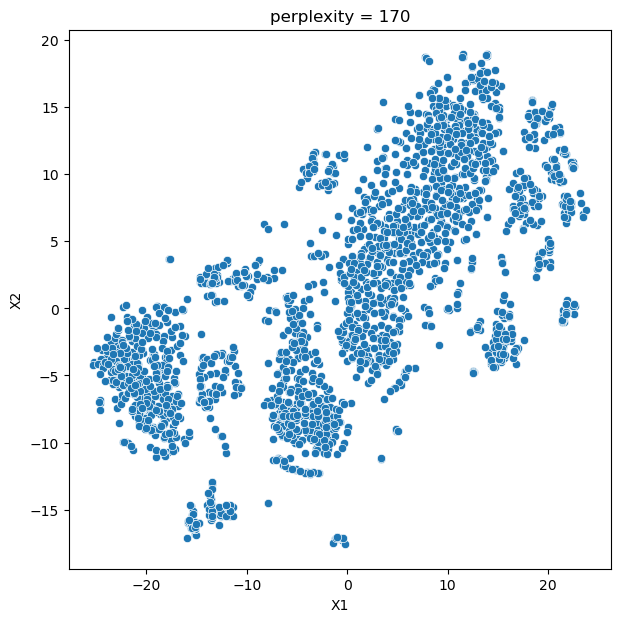

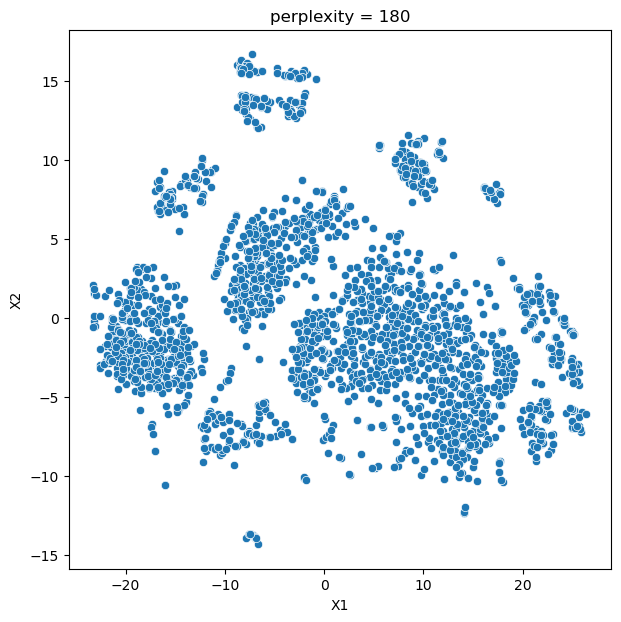

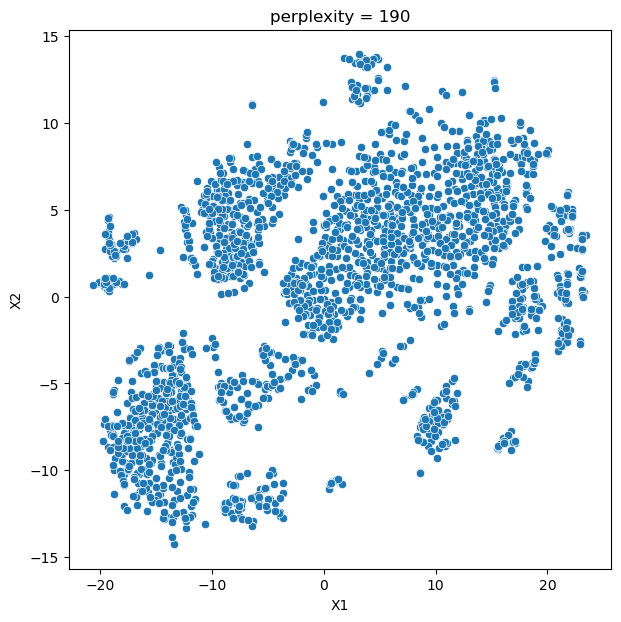

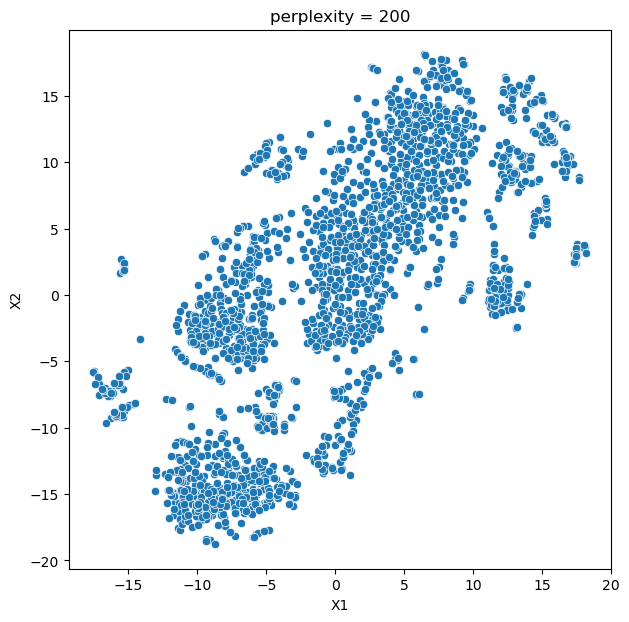

In [33]:
for i in range(100, 210, 10):
    tsne = TSNE(n_components = 2, random_state = 1, perplexity = i)
    
    data_tsne = tsne.fit_transform(data_scaled)
    
    data_tsne = pd.DataFrame(data_tsne)
    
    data_tsne.columns = ['X1', 'X2']
    
    plt.figure(figsize = (7, 7))
    
    sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne)
    
    plt.title("perplexity = {}".format(i))

**Observations:**

Higher dimenson of perplexity is required in order for model to properly identify the four unique segments

In [34]:
# Let's assign points to 4 different groups
def grouping(x):
    first_component = x['X1']
    
    second_component = x['X2']
    
    if second_component > 12:
        return 'group_1'
    
    elif (second_component < -10) and (first_component > -10): 
        return 'group_2'
    
    elif (second_component < 12) and (first_component > -9):
        return 'group_3'
    
    else: 
        return 'group_4'

In [35]:
data_tsne['groups'] = data_tsne.apply(grouping, axis = 1)

<AxesSubplot: xlabel='X1', ylabel='X2'>

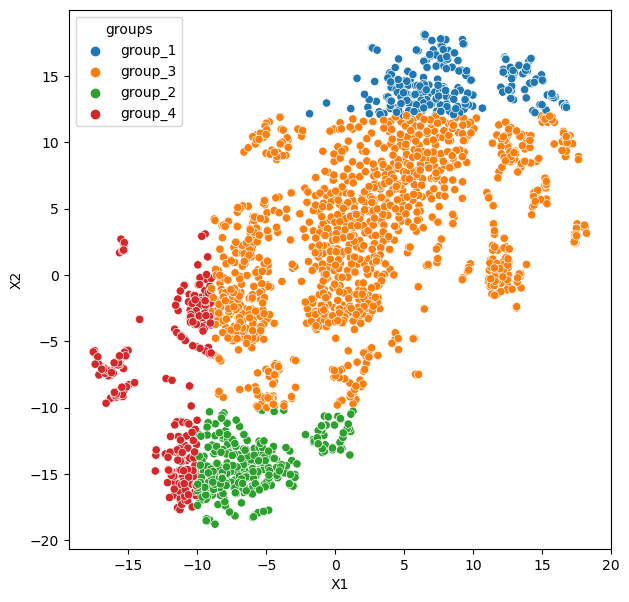

In [36]:
# Scatter plot for two components with hue
plt.figure(figsize = (7, 7))

sns.scatterplot(x = 'X1', y = 'X2', data = data_tsne, hue = 'groups')

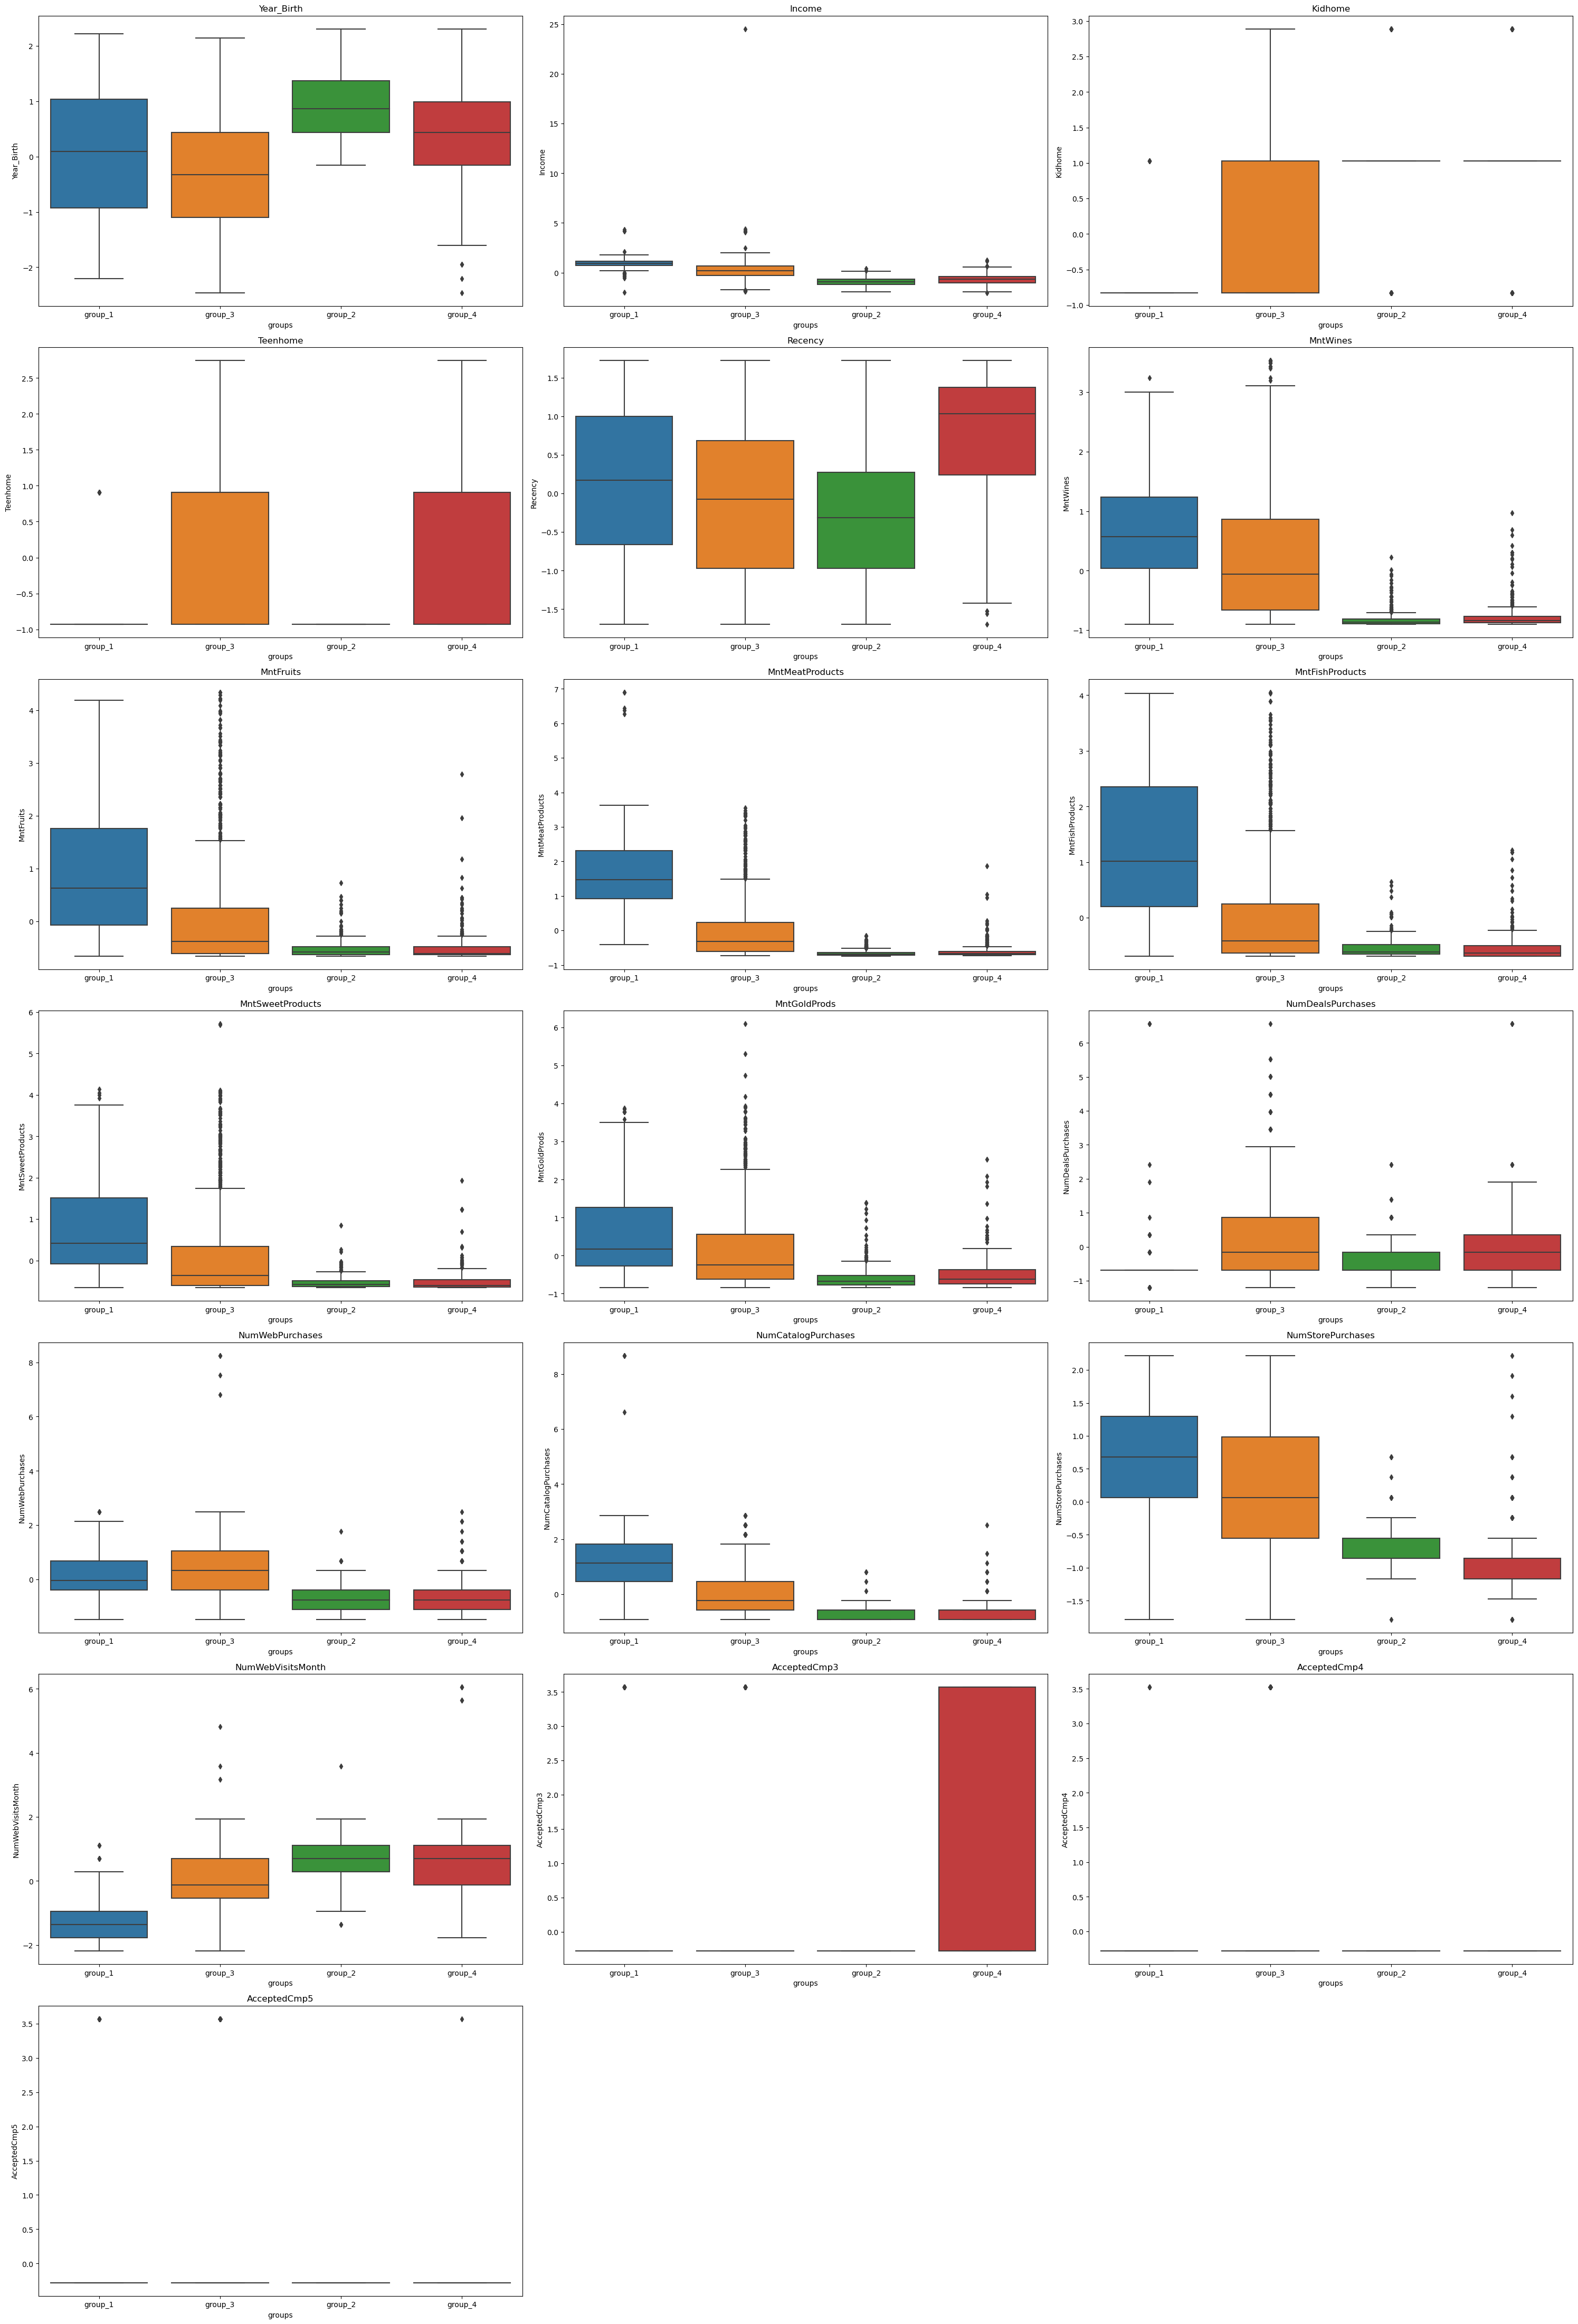

In [37]:
all_col = data_scaled.columns[:-4].tolist()

plt.figure(figsize = (30, 50))

for i, variable in enumerate(all_col):
    plt.subplot(8, 3, i + 1)
    
    sns.boxplot(y=data_scaled[variable], x=data_tsne['groups'])
    
    plt.tight_layout()
    
    plt.title(variable)

plt.show()

**Observations:**

Marketing team should prioritize group 1 for in store shopping as they are the most frequent to purchas in that domain. They have the highest purchase level of meats, fish, products, and sweet. These appear to not having children. 

Group 2 is your family households and tend to do more virtual (web) shopping. These users can be marketed via webpage or mobile application (if applicable) and prioritizing family centric products (diapers, bottles, toys, etc.)

Group 3 and 4 need other variables to understand how best to serve them. The best way to interact with them would be via the internet as they appear to be visiting the most out of the groups studied.
